# **Regresión Logistica**

# *Introducción*

El objetivo de este ejercicio es trabajar con librerías de Python para manejar el modelo de regresión lineal, donde encontraremos el código, y la explicación de las líneas, además conclusiones de los resultados obtenidos.

# *Descripción:*

Área: *Automotriz*

En el ejercicio propuesto vamos a ver la relación entre Predecir si un automóvil necesitará una reparación importante (0 = No, 1 = Sí) basándose en factores como el kilometraje, la antigüedad y el costo de reparaciones anteriores..


             Mileage  Age  Repairs               Cost
0  15515766655801400    9        1  17618005001718600
1  12883495868948500   12        5  26556196162914400
2   5125289847111740   16        2   8713368536860940
3    175438953296527   19        3   6640486325769680
4  14776336108007200   15        5  22127996329732000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Mileage  2000 non-null   int64
 1   Age      2000 non-null   int64
 2   Repairs  2000 non-null   int64
 3   Cost     2000 non-null   int64
dtypes: int64(4)
memory usage: 62.6 KB
None
            Mileage          Age      Repairs          Cost
count  2.000000e+03  2000.000000  2000.000000  2.000000e+03
mean   1.238784e+16    10.030500     4.557500  1.390200e+16
std    1.153991e+16     5.451002     2.859332  1.269171e+16
min    2.687872e+12     1.000000     0.000000  1.426809e+13
25%    5.0

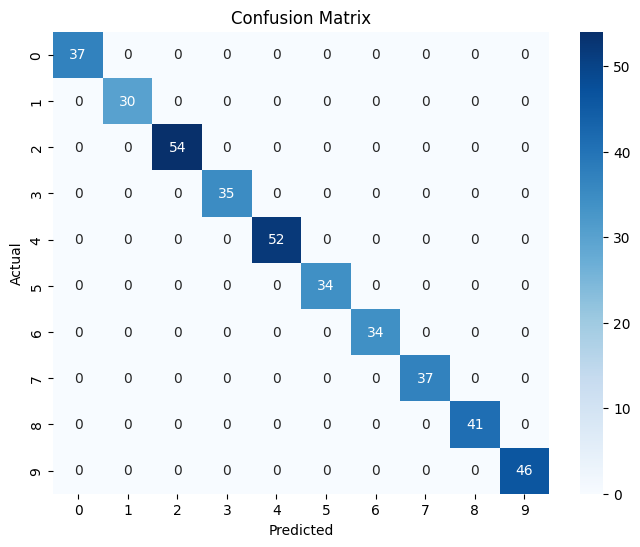

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        46

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy: 100.00%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Cargar el archivo csv
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQgHt_tE8Lizd5hMzhF6eOZir1otCQSsGWho9Qe1GZTaJ8zmHcp48eSg_N7T7DmD2vT9b2th7Zs6ond/pub?gid=704626624&single=true&output=csv')

# Visualizar los datos
print(data.head())  # Muestra las primeras filas del DataFrame para una vista preliminar
print(data.info())  # Proporciona información sobre el DataFrame, incluyendo tipos de datos y valores nulos
print(data.describe())  # Genera estadísticas descriptivas para las columnas numéricas del DataFrame

# Target reparaciones
x = data.drop(['Mileage','Age','Cost'], axis=1)  # Elimina las columnas no necesarias para las características
y = data['Repairs']  # Define la variable objetivo que indica si se requieren reparaciones

# Dividir el data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Divide los datos en conjuntos de entrenamiento y prueba (80/20)

# Estandarizar los datos
scaler = StandardScaler()  # Inicializa el escalador
x_train_scaled = scaler.fit_transform(x_train)  # Ajusta y transforma los datos de entrenamiento
x_test_scaled = scaler.transform(x_test)  # Transforma los datos de prueba usando el mismo escalador

# Crear el modelo
Logistic_model = LogisticRegression()  # Crea una instancia del modelo de regresión logística

# Entrenar el modelo
Logistic_model.fit(x_train_scaled, y_train)  # Ajusta el modelo a los datos de entrenamiento

# Realizar predicciones de la prueba
y_pred = Logistic_model.predict(x_test_scaled)  # Realiza predicciones sobre el conjunto de prueba

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)  # Genera la matriz de confusión para evaluar las predicciones

# Visualización
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)  # Crea un mapa de calor para visualizar la matriz de confusión
plt.xlabel('Predicted')  # Etiqueta del eje x
plt.ylabel('Actual')  # Etiqueta del eje y
plt.title('Confusion Matrix')  # Título del gráfico
plt.show()  # Muestra el gráfico

# Imprimir el reporte
print(classification_report(y_test, y_pred))  # Imprime un informe con métricas de precisión, recall y F1-score

# Imprimir exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)  # Calcula la exactitud del modelo
print(f'Accuracy: {accuracy * 100:.2f}%')  # Imprime la exactitud en formato porcentaje
